# <font color='skyblue'>**Aplicaciones de la Inteligencia Artificial**</font>


Exame IA

**Fecha de entrega: 18-12-2023**

Integrantes:

Barbara Matus Calfulef - barbaravmatus@outlook.com

Luis Bahamondes Meneses - lbahamondesm@gmail.com

# <font color='gold'>**Indicaciones:**</font>

Estimado/a participante el siguiente set de preguntas corresponde a la evaluación clasificable como Trabajo único dentro del plan de evaluación de la asignatura.

- Esta evaluación debe ser resuelta en grupo (los grupos ya han sido definidos).
- Lea atentamente las instrucciones de cada apartado.
- Puntaje ideal de la prueba 100 puntos.
- Cada criterio tiene un puntaje asignado.   
- Esta prueba será evaluada con una escala de 1,0 a 7,0 con un porcentaje de exigencia de un 50%
- Toda copia, en parte o su totalidad, entre trabajos será sancionada con nota 1.0.
- Para responde debe utilizar el Python y google colab.
- Al finalizar, debe subir el desarrollo en formato google colab de esta evaluación al sector ”Evaluaciones”, del aula virtual de la asignatura. Con el siguiente nombre:  EVALUACION_X_ DIP339_NRC_APELLIDO1_APELLIDO2_APELLIDO3
- Se carga un archivo cuando la evaluación es grupal.
- 𝑁𝑜𝑡𝑎 𝑓𝑖𝑛𝑎𝑙 = (𝑃𝑢𝑛𝑡𝑎𝑗𝑒 𝑜𝑏𝑡𝑒𝑛𝑖𝑑𝑜/𝑃𝑢𝑛𝑡𝑎𝑗𝑒 𝑚á𝑥𝑖𝑚𝑜) ∗ 6,0 + 1,0
- Fecha de entrega:  Viernes 25 de diciembre  2023
- En caso de dudas comunicarse con el docente al correo oyanez@udla.cl

# <font color='pink'>**Contenidos a evaluar**</font>

- ChatBots
- NLP
- Python



## <font color='magenta'>**Descripción**</font>
**ChatBot (Crear un chatbot a nivel de código)**


1.	Programar un chatbot en código Python que puede interactuar a nivel de consola con el usuario. Este chatbot es de temática libre para esta evaluación.

2.	El chatbot como mínimo debe establecer un flujo de conversación como mínimo de 6 repuestas seguidas coherentes entre el programa y usuario. Ejemplo

3. Utilizar bibliotecas predeterminadas como por ejemplo chatterbot, spaCy, NLTK, TextBlob, DeepPavlov, etc...

4. Desarrollar el diagrama esquemático de la arquitectura principal del chatbot.

5. Entregue un documento .ipynb.



**Natural Language Processing (programa en Python para Procesamiento del Lenguaje Natural):**


1. Obtener datos, para obtener los datos puede ocupar una lista de cuentos similar a la presentada en la clase, o lista de canciones, es a elección libre.

2. Cargar los datos

3. Limpiar datos

4. Análisis Exploratorio

5. Análisis de Sentimiento

6. Realizar gráficos que permitan visual los datos, donde requiera.

7. Entregue un documento .ipynb.



## <font color='turquoise'>**Rúbrica**</font>


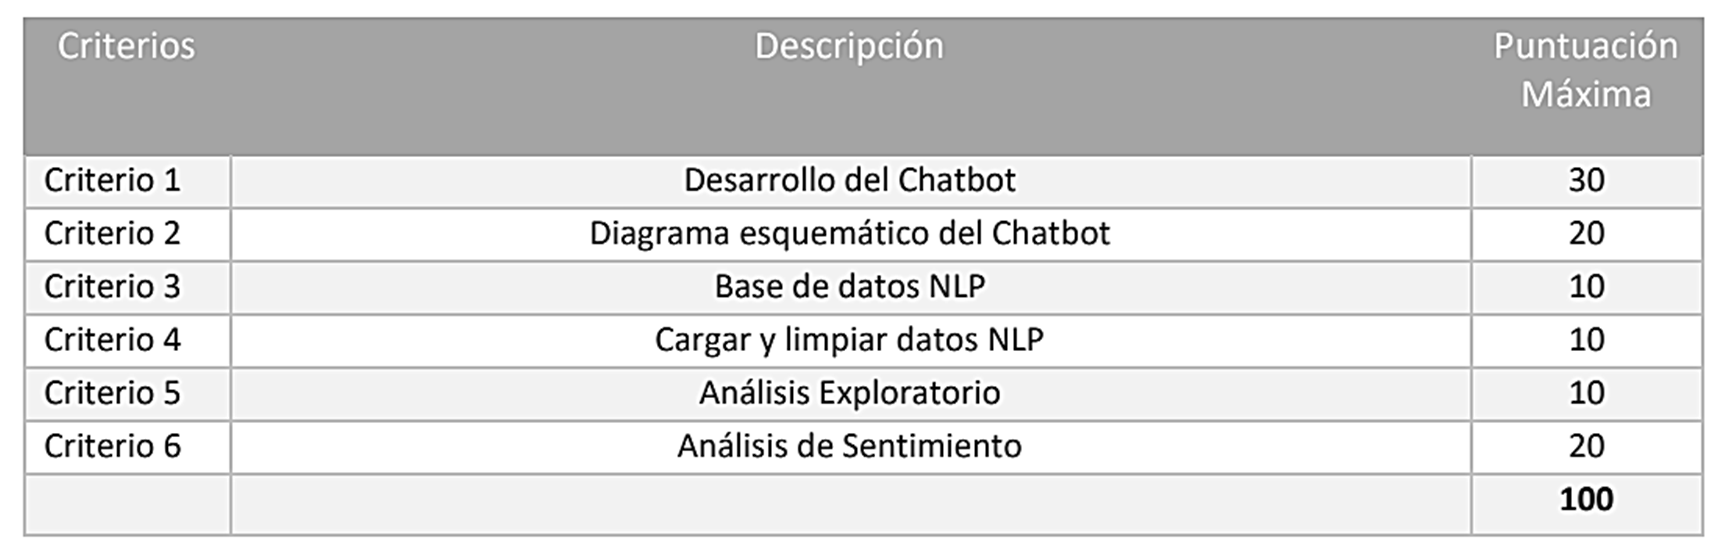

# <font color='lime'>**Desarrollo**</font>


## <font color='orange'>**Desarrollo del Chatboot**</font>



In [ ]:
!python -m spacy download es_core_news_sm

2023-12-17 19:03:04.137514: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-17 19:03:04.137582: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-17 19:03:04.139681: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-17 19:03:06.048738: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 76.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
#Importamnos librerias a utilizar
import nltk
#para transformar y simplificar palabras
from nltk.stem.lancaster import LancasterStemmer
import numpy
#import tflearn
#import tensorflow
import json
import random
import pickle
import spacy
import en_core_web_sm

**1. Separar en oraciones:**

In [ ]:
# Carga el modelo en español
nlp = spacy.load('es_core_news_sm')

# 1. Separar en oraciones
def separar_oraciones(texto):

    doc = nlp(texto)
    oraciones = [oracion.text for oracion in doc.sents]
    return oraciones

**2. Extraer la raíz de una palabra:**

In [ ]:
# 2. Extraer la raíz de una palabra
def extraer_raiz(palabra):
    token = nlp(palabra)[0]
    raiz = token.lemma_
    return raiz


**3. Tokenizar y extraer la estructura de la oración:**

In [ ]:
# 3. Tokenizar y extraer la estructura de la oración
def analizar_oracion(oracion):
    doc = nlp(oracion)
    estructura = [(token.text, token.dep_) for token in doc]
    return estructura


**4. ChatBot**


In [ ]:
# 4. Funciones del chatbot
def saludar():
    return "¡Hola! ¿En qué puedo ayudarte hoy?"


In [ ]:
def identificar_nombre(oracion):
    doc = nlp(oracion)

    # Busca la entidad de persona en la oración
    entidad_persona = next((ent for ent in doc.ents if ent.label_ == "PER"), None)

    if entidad_persona:
        nombre = entidad_persona.text
        return f"¡Hola, {nombre}! Si quieres agregar un evento, escribe : agregar evento"
    else:
        # Si no se encuentra una entidad de persona, intenta extraer el sujeto desde la estructura 'flat'
        sujeto_flat = next((token.text for token in doc if token.dep_ == 'flat' and token.head.text.lower() == 'hola'), None)
        if sujeto_flat:
            return f"¡Hola, {sujeto_flat}! ¿Cómo puedo ayudarte?"
        else:
            return "Hola. Si quieres agregar un evento, escribe : agregar evento"


In [ ]:
def agregar_evento(fecha, descripcion):
    eventos.append({"Fecha": fecha, "Descripción": descripcion})
    return f"Evento agregado: {descripcion} el {fecha}"

def mostrar_eventos():
    if eventos:
        print("Lista de eventos:")
        for evento in eventos:
            print(f"- {evento['Descripción']} el {evento['Fecha']}")
    else:
        print("No hay eventos programados en la agenda.")
def eliminar_evento(numero_evento):
    try:
        numero_evento = int(numero_evento)
        if 1 <= numero_evento <= len(eventos):
            evento_eliminado = eventos.pop(numero_evento - 1)
            print(f"Evento eliminado: {evento_eliminado['Descripción']} el {evento_eliminado['Fecha']}")
        else:
            print("Número de evento no válido.")
    except ValueError:
        print("Por favor, introduce un número válido.")

In [ ]:
# Lista para almacenar eventos
eventos = []

In [ ]:
# Función principal del chatbot
def chatbot():
    print("¡Hola! Soy un chatbot. Puedes empezar pidiendome agregar un evento o saludándome.")
    for _ in range(6):  # Limitar a 6 interacciones
        oracion_usuario = input("Tú: ")

        if oracion_usuario.lower() == 'muchas gracias':
            print("¡Hasta la proxima!")
            break

        oraciones = separar_oraciones(oracion_usuario)

        for oracion in oraciones:
            print(f"Oración: {oracion}")
            raiz_palabra = extraer_raiz(oracion)
            print(f"Raíz de la palabra: {raiz_palabra}")
            estructura_oracion = analizar_oracion(oracion)
            print(f"Estructura de la oración: {estructura_oracion}")

        # Lógica del chatbot
        if any(saludo in oracion_usuario.lower() for saludo in ["hola", "hi", "¡buen día!", "saludos", "Hola", "holis", "ola", "que tal", "Holis", "buen dia"]):
            print(saludar())
        elif "ayuda" in oracion_usuario.lower():
            print("Claro, ¿en qué puedo ayudarte?")
        elif any(agregar_evento in oracion_usuario.lower() for agregar_evento in ["agregar evento", "agregar un evento","añadir evento", "crear evento", "Agregar un evento"]):
            fecha = input("¿Cuándo es el evento? (Formato: DD/MM/YYYY) ")
            descripcion = input("Describe el evento: ")
            resultado = agregar_evento(fecha, descripcion)
            print(resultado)
        elif "mostrar eventos" in oracion_usuario.lower():}
            mostrar_eventos()
        elif "eliminar evento" in oracion_usuario.lower():
            numero_evento = input("Indica el número del evento que quieres eliminar: ")
            eliminar_evento(numero_evento)
        else:
            print("Lo siento, no entendí. ¿Puedes reformular tu pregunta?")

# Inicia el chatbot
chatbot()

¡Hola! Soy un chatbot. Puedes empezar pidiendome agregar un evento o saludándome.
Tú: Hola
Oración: Hola
Raíz de la palabra: Hola
Estructura de la oración: [('Hola', 'ROOT')]
¡Hola! ¿En qué puedo ayudarte hoy?
Tú: agregar un evento
Oración: agregar un evento
Raíz de la palabra: agregar
Estructura de la oración: [('agregar', 'ROOT'), ('un', 'det'), ('evento', 'obj')]
¿Cuándo es el evento? (Formato: DD/MM/YYYY) 31/12/2023
Describe el evento: Termina el año 2023
Evento agregado: Termina el año 2023 el 31/12/2023
Tú: muchas gracias
¡Hasta la proxima!


## <font color='orange'>**Diagrama Esquemático del Chatbot**</font>


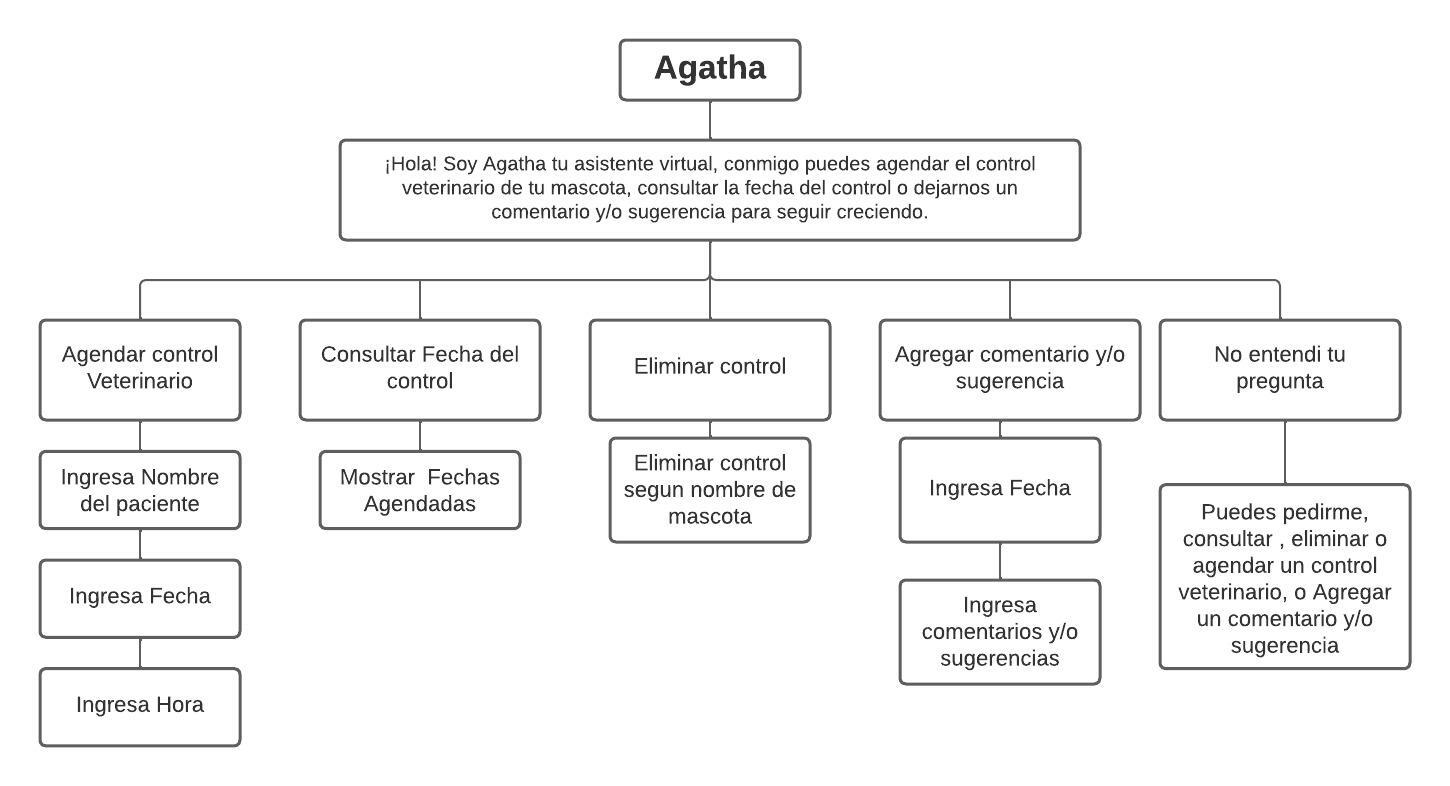

## <font color='orange'>**Base de datos NLP**</font>


## <font color='orange'>**Cargar y Limpiar datos NLP**</font>


## <font color='orange'>**Analisis Exploratorio**</font>


## <font color='orange'>**Analisis de Sentimientos**</font>
